In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
data = pd.read_csv("StudentsPerformance.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
#랜덤하게 데이터 5개 확인함 
data.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
842,female,group B,high school,free/reduced,completed,23,44,36
129,female,group A,bachelor's degree,standard,none,51,49,51
222,female,group C,some high school,free/reduced,none,55,65,62
296,male,group A,some high school,standard,completed,46,41,43
23,female,group C,some high school,standard,none,69,73,73


In [9]:
#랜덤하게 확인, 비율중심 : 10%
data.sample(frac=0.1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
182,female,group E,high school,standard,none,50,50,47
565,male,group B,associate's degree,standard,none,48,43,45
5,female,group B,associate's degree,standard,none,71,83,78
591,male,group A,some high school,standard,none,71,62,50
227,male,group D,high school,standard,none,57,50,54
...,...,...,...,...,...,...,...,...
3,male,group A,associate's degree,free/reduced,none,47,57,44
44,female,group E,associate's degree,free/reduced,none,50,56,54
128,male,group D,master's degree,standard,none,82,82,74
81,male,group B,high school,free/reduced,none,49,45,45


In [10]:
#각 컬럼의 type 확인하기 =info와 비슷 
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [11]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [15]:
#데이터가 비었는지 확인 
data.isnull().values.any()

False

In [16]:
#어디서 데이터가 비었는지 확인 
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
data.rename(columns=({'gender':'Gender',
                      'race/ethnicity':'Race/Ethnicity',
                      'parental level of education':'Parental_Level_of_Education'
                    ,'lunch':'Lunch','test preparation course':'Test_Preparation_Course'
                      ,'math score':'Math_Score','reading score':'Reading_Score'
                     ,'writing score':'Writing_Score'}),inplace=True)
data

,Gender,Race/Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [20]:
data["Gender"].value_counts()

female    518
male      482
Name: Gender, dtype: int64

In [9]:
data["Gender"].value_counts().values

array([518, 482], dtype=int64)

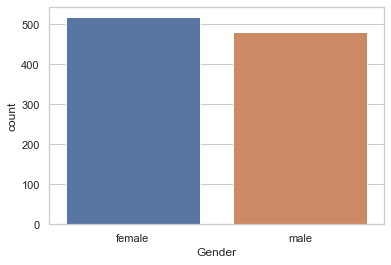

In [25]:
sns.countplot(data=data, x='Gender')

In [22]:
data["Gender"].unique()

array(['female', 'male'], dtype=object)

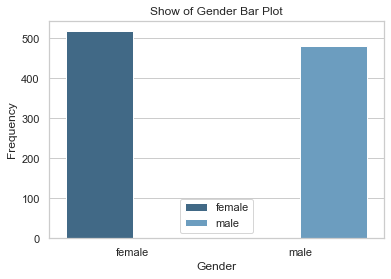

In [8]:
#성별에 대한 barplot 그려보기 

#기본적인 그리기 위한 스타일 지정
sns.set(style='whitegrid')

#정확하게 x, y에 대한 값을 지정하면서 그리는 스타일.... : 다이렉트로 접근하는거. 
ax = sns.barplot(x=data["Gender"].value_counts().index, #[femaie, male]
                 y=data["Gender"].value_counts().values, #[300, 700]
                 palette="Blues_d",
                 hue=["female", "male"])

#기타옵션
plt.legend(loc=8)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of Gender Bar Plot')
plt.show()

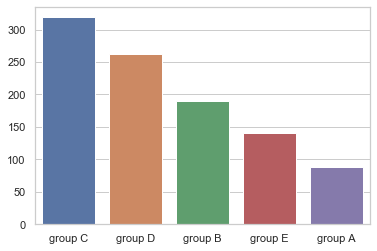

In [29]:
#성별에 대한 barplot 그려보기 

#기본적인 그리기 위한 스타일 지정
sns.set(style='whitegrid')

#정확하게 x, y에 대한 값을 지정하면서 그리는 스타일.... : 다이렉트로 접근하는거. 
ax = sns.barplot(x=data["Race/Ethnicity"].value_counts().index, #[femaie, male]
                 y=data["Race/Ethnicity"].value_counts().values, #[300, 700]
                 )

#기타옵션
plt.show()



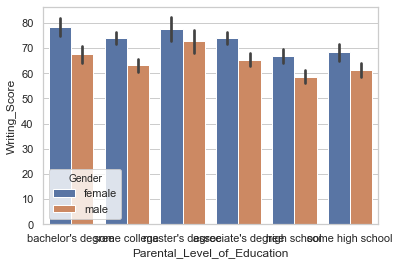

In [33]:
sns.barplot(data=data,
            x="Parental_Level_of_Education",
            y="Writing_Score",
            hue="Gender"#성별에 따라서 나눠보겠다. 
)

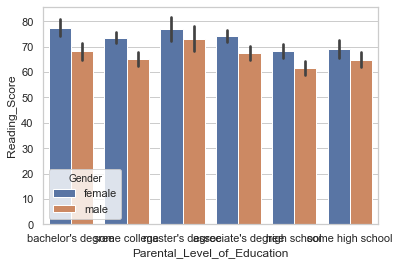

In [34]:
sns.barplot(data=data,
            x="Parental_Level_of_Education",
            y="Reading_Score",
            hue="Gender"#성별에 따라서 나눠보겠다. 
)

In [35]:
sns.barplot(
            x="Math_Score",
            y="Gender",
            hue="Parental_Level_of_Education"#성별에 따라서 나눠보겠다. 
)

ValueError: Could not interpret input 'Math_Score'

In [36]:
data["Test_Preparation_Course"].value_counts()

none         642
completed    358
Name: Test_Preparation_Course, dtype: int64

In [40]:
data_lunch_score = data[data["Test_Preparation_Course"]=="completed"].groupby(data['Lunch'])["Writing_Score"].mean()
data_lunch_score

Lunch
free/reduced    70.351145
standard        76.766520
Name: Writing_Score, dtype: float64